### Append Path

In [1]:
import sys

sys.path.append("..")

%reload_ext autoreload
%autoreload 2

### Load Data

In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/merged_data.csv", low_memory=False)

print(f"Original Shape: {df.shape}")

df.head()

Original Shape: (2731946, 18)


,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,kWp,Number of panels,Panel,Inverter,Optimizers,Metric,lat,Lon
0,2,1,2020-01-01 00:15:00,NaN,18.560000,20.300000,9.600000,50.266667,8.680000,152.666667,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
1,2,1,2020-01-01 00:30:00,NaN,18.146667,19.840000,9.340000,50.666667,7.933333,157.533333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
2,2,1,2020-01-01 00:45:00,NaN,18.140000,19.886667,9.486667,51.000000,8.440000,147.600000,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
3,2,1,2020-01-01 01:00:00,NaN,17.693333,19.540000,9.180000,51.133333,8.680000,151.333333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
4,2,1,2020-01-01 01:15:00,NaN,17.613333,19.153333,9.053333,51.933333,6.866667,149.333333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679


### Clean Data

In [3]:
from src.preprocessing import clean_data, filter_valid_sites

df_clean = clean_data(df)
df_clean = filter_valid_sites(df_clean)

print(f"\nCleaned Shape: {df_clean.shape}\n")

print(df_clean.isnull().sum())

Dropped 1536301 rows with missing Target.

Dropping 485641 rows with missing 'kWp' capacity data.

Cleaned Shape: (710004, 18)

CampusKey              0
SiteKey                0
Timestamp              0
SolarGeneration        0
ApparentTemperature    0
AirTemperature         0
DewPointTemperature    0
RelativeHumidity       0
WindSpeed              0
WindDirection          0
kWp                    0
NumberOfPanels         0
Panel                  0
Inverter               0
Optimizers             0
Metric                 0
lat                    0
Lon                    0
dtype: int64


### Feature Engineering

In [4]:
from src.preprocessing import get_distinct_values, extract_hardware_specs

get_distinct_values(df_clean, ["Panel", "Inverter", "Optimizers"])
    
df_clean = extract_hardware_specs(df_clean)

df_clean.head()

Distinct values in 'Panel': ['Trina 330W', 'Trina 310W', 'TBD', 'SunpowerSPR-E20-435-COM']
Distinct values in 'Inverter': ['2 x SolarEdge SE27.6K', '1 x SolarEdge SE82.8K', 'SMA', '1 x SolarEdge SE25K + 1 x SolarEdge SE15K', '3 x SolarEdge SE50K', '1 x SolarEdge SE27.6K', '2 x SolarEdge SE25K + 1 x SolarEdge SE15K', '2 x SolarEdge SE17K', '1 x SolarEdge SE50K', '4 x SolarEdge SE82.8K', '1 x SolarEdge SE17K + 1 x SolarEdge SE15K', '5 X ABB', '2 x SolarEdge SE15K', '1 x SolarEdge SE17K', '1 x SolarEdge SE25K', '1 x SolarEdge SE27.6K + 1 x SolarEdge SE15K', '1 x SolarEdge SE25K + 1 x SolarEdge SE17K']
Distinct values in 'Optimizers': ['100 x P730', '152 x P700', 'None', '77 x P730', '255 x P730', '53 x P700', '117 x P730', '61 x P730', '110 x P730', '97 x P700', '584 x P730', '59 x P730', '74 x P700', '116 x P730', '58 x P730', '133 x P730', '35 x P700', '48 x P700', '76 x P730', '78 x P730', '86 x P730', '77 x P700', '129 x P730']

Extracted hardware specs: PanelRatingW, TotalInverterKW,

,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,...,NumberOfPanels,Panel,Inverter,Optimizers,Metric,lat,Lon,PanelRatingW,TotalInverterKW,OptimizerCount
853120,1,14,2020-06-14 08:00:00,0.137360,6.700000,9.240000,9.140000,99.000000,12.04,333.666667,...,200.0,Trina 330W,2 x SolarEdge SE27.6K,100 x P730,kWh,-37.718287,145.050975,330.0,55.2,100.0
853121,1,14,2020-06-14 08:15:00,0.432175,6.593333,9.493333,9.073333,97.266667,13.96,327.600000,...,200.0,Trina 330W,2 x SolarEdge SE27.6K,100 x P730,kWh,-37.718287,145.050975,330.0,55.2,100.0
853122,1,14,2020-06-14 08:30:00,0.738617,6.900000,9.860000,8.433333,90.866667,13.48,328.933333,...,200.0,Trina 330W,2 x SolarEdge SE27.6K,100 x P730,kWh,-37.718287,145.050975,330.0,55.2,100.0
853123,1,14,2020-06-14 08:45:00,0.993897,7.353333,10.306667,8.033333,85.866667,12.76,337.266667,...,200.0,Trina 330W,2 x SolarEdge SE27.6K,100 x P730,kWh,-37.718287,145.050975,330.0,55.2,100.0
853124,1,14,2020-06-14 09:00:00,1.353455,7.760000,10.580000,7.786667,82.866667,12.04,343.800000,...,200.0,Trina 330W,2 x SolarEdge SE27.6K,100 x P730,kWh,-37.718287,145.050975,330.0,55.2,100.0


In [5]:
from src.preprocessing import feature_engineering

df_fe = feature_engineering(df_clean)

print(f"Feature Engineered Shape: {df_fe.shape}")

df_fe.head()

Feature Engineered Shape: (710004, 40)


,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,...,SolarElevation,TempDeviation,HighTempPenalty,TempDewSpread,HumidityTemp,WindCoolingEffect,AvgPanelKW,InverterPanelRatio,OptimizerCoverage,Season
853120,1,14,2020-06-14 08:00:00,0.137360,6.700000,9.240000,9.140000,99.000000,12.04,333.666667,...,6.955085,15.760000,0.0,0.100000,9.147600,111.249600,0.329998,0.836351,0.499998,2
853121,1,14,2020-06-14 08:15:00,0.432175,6.593333,9.493333,9.073333,97.266667,13.96,327.600000,...,9.291626,15.506667,0.0,0.420000,9.233849,132.526933,0.329998,0.836351,0.499998,2
853122,1,14,2020-06-14 08:30:00,0.738617,6.900000,9.860000,8.433333,90.866667,13.48,328.933333,...,11.542790,15.140000,0.0,1.426667,8.959453,132.912800,0.329998,0.836351,0.499998,2
853123,1,14,2020-06-14 08:45:00,0.993897,7.353333,10.306667,8.033333,85.866667,12.76,337.266667,...,13.700472,14.693333,0.0,2.273333,8.849991,131.513067,0.329998,0.836351,0.499998,2
853124,1,14,2020-06-14 09:00:00,1.353455,7.760000,10.580000,7.786667,82.866667,12.04,343.800000,...,15.756019,14.420000,0.0,2.793333,8.767293,127.383200,0.329998,0.836351,0.499998,2


### Visualize Data

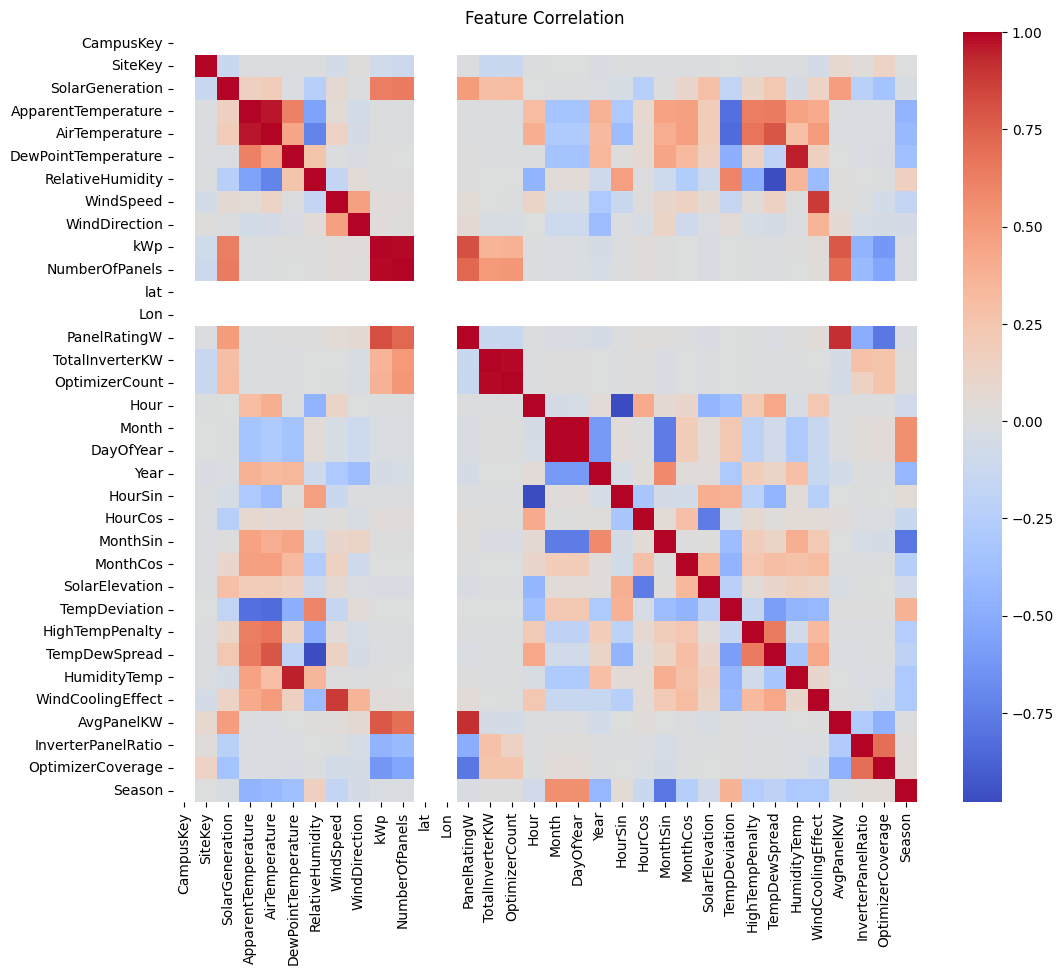

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
numeric_cols = df_fe.select_dtypes(include=["float64", "int64", "int32"]).columns

sns.heatmap(df_fe[numeric_cols].corr(), cmap="coolwarm", annot=False)

plt.title("Feature Correlation")

plt.show()

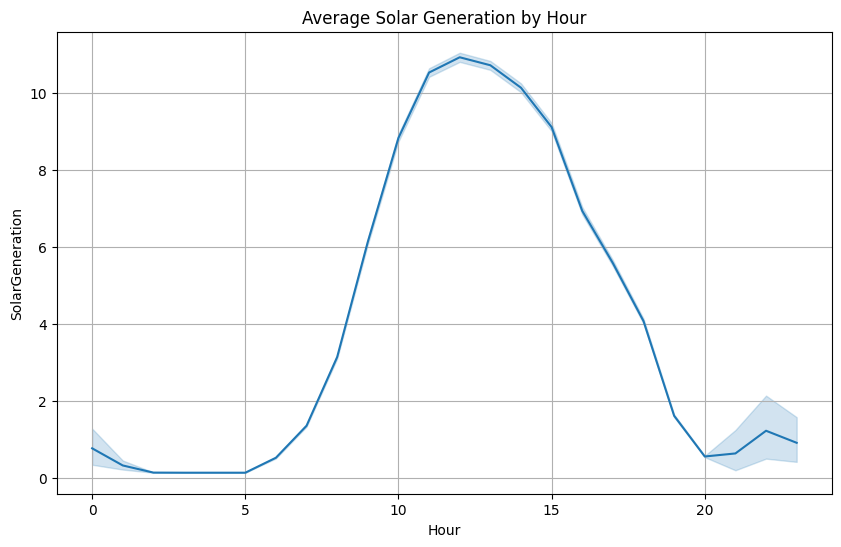

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fe, x="Hour", y="SolarGeneration")
plt.title("Average Solar Generation by Hour")
plt.grid(True)
plt.show()

### Save Data

In [8]:
df_fe.to_csv("../data/processed/feature_engineered_data.csv", index=False)
print("Feature engineered data saved.")

Feature engineered data saved.
